# Step 2

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
df_SNP = pd.read_csv("matrix_1kg.txt", sep = "\t")
df_SNP

,CHROM,POS,REF,ALT,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,...,NA21128,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144
0,chr21,14347281,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,chr21,14003813,T,C,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,chr21,39261634,T,A,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,chr21,17793478,A,G,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,chr21,35934376,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,chr21,28142462,A,C,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,chr21,17061272,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,chr21,43768467,C,A,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,chr21,36334991,G,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
alt_all_sum = df_SNP.iloc[:,4:].sum(axis=1)
num_chrom = (2*len(df_SNP.columns))
alt_all_freq = alt_all_sum/num_chrom

alt_all_freq

0       0.000392
1       0.019201
2       0.003331
3       0.002155
4       0.000392
          ...   
9995    0.020572
9996    0.000196
9997    0.001371
9998    0.028801
9999    0.002547
Length: 10000, dtype: float64

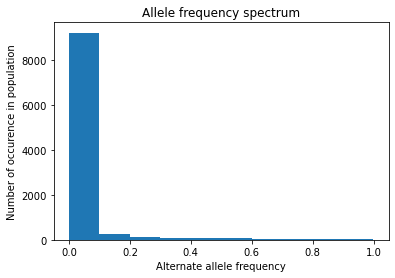

In [4]:
fig, ax = plt.subplots()
ax.hist(alt_all_freq)

ax.set_title("Allele frequency spectrum")
ax.set_xlabel("Alternate allele frequency")
ax.set_ylabel("Number of occurence in population")

plt.show()

# Step 3

In [5]:
roi1 = 0.05 <= alt_all_freq
roi2 = alt_all_freq <= 0.95

roi1

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [6]:
df_SNP_all = df_SNP.iloc[:,4:]
df_SNP_all

,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,HG00103,HG00104,HG00105,HG00106,...,NA21128,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df_SNP_all = df_SNP_all.loc[roi1, :]
df_SNP_all = df_SNP_all.loc[roi2, :]

df_SNP_all

,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,HG00103,HG00104,HG00105,HG00106,...,NA21128,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144
20,0,1,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
32,1,2,1,1,1,1,0,0,0,1,...,1,1,2,0,0,0,1,1,1,0
38,0,1,2,1,1,1,1,1,1,0,...,0,1,0,1,1,1,1,2,0,1
41,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46,0,0,0,0,0,0,0,0,0,1,...,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9957,1,2,2,2,2,2,1,2,2,1,...,2,2,2,2,2,2,2,2,1,2
9959,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9974,0,1,1,0,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
9975,2,1,0,1,0,1,0,1,2,2,...,1,2,2,2,2,1,2,2,2,2


# Step 4

In [8]:
pca_input = df_SNP_all.T
pca_input

,20,32,38,41,46,54,66,77,93,98,...,9894,9904,9913,9927,9929,9957,9959,9974,9975,9980
HG00096,0,1,0,0,0,0,0,1,0,2,...,0,0,0,0,2,1,1,0,2,0
HG00097,1,2,1,1,0,1,0,0,0,1,...,0,0,0,1,0,2,0,1,1,0
HG00099,1,1,2,0,0,1,0,1,0,2,...,0,1,1,0,1,2,1,1,0,0
HG00100,1,1,1,0,0,1,0,0,0,0,...,0,0,1,0,1,2,0,0,1,0
HG00101,0,1,1,0,0,2,1,0,0,0,...,0,0,1,0,2,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NA21137,0,0,1,0,0,0,0,0,0,0,...,0,0,0,2,2,2,0,1,1,0
NA21141,0,1,1,0,0,0,1,0,0,1,...,0,0,0,0,2,2,0,1,2,0
NA21142,0,1,2,0,0,0,0,0,0,2,...,0,0,1,1,0,2,0,0,2,0
NA21143,0,1,0,0,0,2,1,1,0,0,...,0,1,0,1,1,1,0,0,2,0


In [9]:
pca_input_standardized = StandardScaler().fit_transform(pca_input)

In [10]:
pca = PCA()
pca_output = pca.fit_transform(pca_input_standardized)

In [11]:
pca_output.shape

(2548, 986)

In [15]:
df_pca_output = pd.DataFrame(data=pca_output)
df_pca_output

,0,1,2,3,4,5,6,7,8,9,...,976,977,978,979,980,981,982,983,984,985
0,-6.144930,-9.818567,-1.546365,-5.395417,-0.513648,-0.222545,1.154470,-0.078085,-3.268966,-4.162403,...,-0.004037,-0.002374,0.014155,0.014679,-0.024616,0.002043,-0.002916,3.281028e-15,-1.229686e-16,-2.363193e-16
1,-6.133884,-8.631829,2.557296,-3.895356,0.316534,-2.311645,1.090070,5.256838,-1.983895,1.209582,...,-0.004721,-0.040436,-0.016901,-0.001788,0.004474,0.003524,-0.003061,-1.757228e-15,3.221385e-16,1.835603e-16
2,-6.238473,-7.971870,-0.745890,-4.014154,-0.931642,4.008898,-0.293688,-2.182606,1.217529,-0.142181,...,-0.006806,-0.019330,0.012884,0.003580,-0.007938,-0.013432,0.001784,6.761808e-15,-1.233554e-16,5.169633e-17
3,-5.051218,-7.008727,2.805062,-4.762933,4.376933,0.275677,-0.598794,-2.134788,1.343951,-0.011021,...,-0.007495,0.027261,-0.002045,0.017698,-0.012581,0.002697,0.001758,-2.611181e-15,4.023258e-16,-1.023185e-16
4,-6.634383,-8.543670,3.071927,-1.593226,-4.364291,0.805891,1.261819,-3.809050,1.149675,0.572828,...,-0.004978,0.000999,0.000528,0.017745,0.009293,0.004399,-0.006951,1.643395e-15,9.215169e-16,5.562532e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2543,-6.304582,-0.169819,-2.665369,3.299328,-0.194365,-0.680133,-2.908356,-0.231325,-1.054701,0.802968,...,-0.003122,0.004485,-0.001412,-0.004076,0.016364,-0.003236,-0.002494,-2.671662e-15,-2.039413e-17,-4.986153e-17
2544,-6.295888,-3.116491,-5.555727,3.335322,3.338924,3.595115,-0.754497,-3.635899,-2.059262,1.470570,...,0.029983,0.017059,0.010092,0.017107,-0.011914,0.012279,-0.000063,2.344107e-15,2.801686e-16,-1.293984e-16
2545,-4.096947,-2.827362,-4.180285,3.695060,1.546555,0.358456,-1.254120,0.020336,3.010365,3.294908,...,0.013051,-0.010911,0.001079,0.008906,-0.012381,-0.005436,-0.006090,1.033406e-15,2.077913e-16,-1.347451e-16
2546,-6.263462,-2.585080,-4.225654,3.892088,-3.934635,-1.891613,-0.780392,-0.841957,1.230547,1.728846,...,0.047749,-0.011770,-0.009061,0.010303,-0.013678,-0.001034,-0.008513,2.529740e-16,3.480030e-16,-2.174001e-16


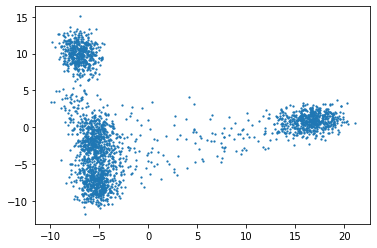

In [18]:
fig, ax = plt.subplots()
ax.scatter(x = df_pca_output[0], y = df_pca_output[1], s=1.5)
plt.show()